# Twister! United States tornadoes

### Analyzing United States tornadoes
Tornadoes occur in many parts of the world, including Australia, Europe, Africa, Asia, and South America, but they are found most frequently in the United States. Outside the United States, two of the highest concentrations of tornadoes are found in Argentina and Bangladesh.

Tornadoes are the most violent of all atmospheric storms and in the United States alone have caused an average of more than 80 deaths and 1,400 injuries each year (based on 1950–2008 data). A tornado is a narrow, violently rotating column of air that extends from the base of a thunderstorm to the ground. Tornado formation is complex and no two tornadoes are the same; however, they need certain conditions to form, including intense or unseasonable heat. Wind speed within a tornado can vary from just above 0 mph up to 70 mph, with an average of 30 mph (NOAA). The Fujita damage scale is used to quantify the intensity of a tornado.

![](tornado_img/2.png)

Explore the map of tornadoes across the United States: Twister! United States tornadoes from 1950 to 2012

### Which states have had the most tornadoes?
Using tornado location data from the United States severe weather report database, provided by the National Oceanic and Atmospheric Administration (NOAA)/National Weather Service Storm Prediction Center (http://www.spc.noaa.gov/gis/svrgis/), you can find the total number of tornadoes by state.

In [3]:
from arcgis.gis import GIS
import pandas as pd

In [4]:
gis = GIS("https://deldev.maps.arcgis.com", "demos_deldev", "DelDevs12")

In [5]:
data = gis.content.search('title:tornado_lyr', 'Feature layer',)

<Item title:"tornado_lyr" type:Feature Layer Collection owner:demos_deldev>
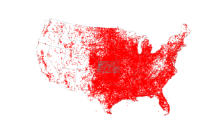

In [6]:
from IPython.display import display

for item in data:
    display(item)

In [11]:
item = data[0]

In [12]:
for lyr in item.layers:
    print(lyr.properties.name)

StatePop_5011
Kansas_tracks
MeanTrack_Merge
Kansas_counties10
Tornadoes_5011


In [14]:
boundary = item.layers[0]

In [16]:
tornado_lyr = item.layers[4]

In [17]:
from arcgis.features.summarize_data import aggregate_points

In [18]:
agg_points = aggregate_points(point_layer=tornado_lyr,  polygon_layer=boundary, keep_boundaries_with_no_points=True,
                              output_name="agg_tornado_points")

In [19]:
agg_points

<Item title:"agg_tornado_points" type:Feature Layer Collection owner:demos_deldev>

In [20]:
m = gis.map('US')
m

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oceans', 'osm', 'satellite', 'streets', 'streets-navigation-vector', 'streets-night-vector', 'streets-relief-vector', 'streets-vector', 'terrain', 'topo', 'topo-vector'], center=[0, 0])

Number of tornadoes by state, 1950–2011


Some states are subject to many more tornadoes than others. Over a 62-year period (1950–2011), Texas had by far the most tornadoes (with 7,935), followed by Kansas (with 3,713), while others such as Vermont, Rhode Island, and the District of Columbia had fewer than 50.

The ten states shown in the graph below had 20 percent of the total number of tornadoes.

Graph of the ten states with the highest number of tornadoes

In [21]:
m.add_layer(agg_points)

### Who has suffered the most?

There can be many devastating effects from a tornado, including loss of life, injuries, property damage, and financial losses. To identify populations that have been affected by tornadoes, you can aggregate the number of tornadoes to the state level and normalize by population.

To normalize by population data where it is already found in the state layer, click the arrow next to the aggregated layer and select Change Symbols. Change to use Color and to show Count of Points, normalized by population and put into three classes, using quantiles.

In [25]:
aggregate_lyr = agg_points.layers[0]

In [28]:
aggregate_lyr.query(out_fields=*, group_by_fields_for_statistics="CASE WHEN (Point_Count >= 2 AND Point_Count < 398.65) THEN 1 WHEN (Point_Count >= 398.65 AND Point_Count < 795.3) THEN 2 WHEN (Point_Count >= 795.3 AND Point_Count < 1191.9499999999998) THEN 3 WHEN (Point_Count >= 1191.9499999999998 AND Point_Count < 1588.6) THEN 4 WHEN (Point_Count >= 1588.6 AND Point_Count < 1985.25) THEN 5 WHEN (Point_Count >= 1985.25 AND Point_Count < 2381.9) THEN 6 WHEN (Point_Count >= 2381.9 AND Point_Count < 2778.55) THEN 7 WHEN (Point_Count >= 2778.55 AND Point_Count < 3175.2000000000003) THEN 8 WHEN (Point_Count >= 3175.2000000000003 AND Point_Count < 3571.8500000000004) THEN 9 WHEN (Point_Count >= 3571.8500000000004 AND Point_Count < 3968.5000000000005) THEN 10 WHEN (Point_Count >= 3968.5000000000005 AND Point_Count < 4365.150000000001) THEN 11 WHEN (Point_Count >= 4365.150000000001 AND Point_Count < 4761.8) THEN 12 WHEN (Point_Count >= 4761.8 AND Point_Count < 5158.45) THEN 13 WHEN (Point_Count >= 5158.45 AND Point_Count < 5555.099999999999) THEN 14 WHEN (Point_Count >= 5555.099999999999 AND Point_Count < 5951.749999999999) THEN 15 WHEN (Point_Count >= 5951.749999999999 AND Point_Count < 6348.399999999999) THEN 16 WHEN (Point_Count >= 6348.399999999999 AND Point_Count < 6745.049999999998) THEN 17 WHEN (Point_Count >= 6745.049999999998 AND Point_Count < 7141.699999999998) THEN 18 WHEN (Point_Count >= 7141.699999999998 AND Point_Count < 7538.349999999998) THEN 19 WHEN (Point_Count >= 7538.349999999998 AND Point_Count <= 7934.999999999997) THEN 20 ELSE 0 END, out_sr=102100, out_statistics=[{"statisticType":"count","onStatisticField":"*","outStatisticFieldName":"countOFExpr"}]", order_by_fields="CASE WHEN (Point_Count >= 2 AND Point_Count < 398.65) THEN 1 WHEN (Point_Count >= 398.65 AND Point_Count < 795.3) THEN 2 WHEN (Point_Count >= 795.3 AND Point_Count < 1191.9499999999998) THEN 3 WHEN (Point_Count >= 1191.9499999999998 AND Point_Count < 1588.6) THEN 4 WHEN (Point_Count >= 1588.6 AND Point_Count < 1985.25) THEN 5 WHEN (Point_Count >= 1985.25 AND Point_Count < 2381.9) THEN 6 WHEN (Point_Count >= 2381.9 AND Point_Count < 2778.55) THEN 7 WHEN (Point_Count >= 2778.55 AND Point_Count < 3175.2000000000003) THEN 8 WHEN (Point_Count >= 3175.2000000000003 AND Point_Count < 3571.8500000000004) THEN 9 WHEN (Point_Count >= 3571.8500000000004 AND Point_Count < 3968.5000000000005) THEN 10 WHEN (Point_Count >= 3968.5000000000005 AND Point_Count < 4365.150000000001) THEN 11 WHEN (Point_Count >= 4365.150000000001 AND Point_Count < 4761.8) THEN 12 WHEN (Point_Count >= 4761.8 AND Point_Count < 5158.45) THEN 13 WHEN (Point_Count >= 5158.45 AND Point_Count < 5555.099999999999) THEN 14 WHEN (Point_Count >= 5555.099999999999 AND Point_Count < 5951.749999999999) THEN 15 WHEN (Point_Count >= 5951.749999999999 AND Point_Count < 6348.399999999999) THEN 16 WHEN (Point_Count >= 6348.399999999999 AND Point_Count < 6745.049999999998) THEN 17 WHEN (Point_Count >= 6745.049999999998 AND Point_Count < 7141.699999999998) THEN 18 WHEN (Point_Count >= 7141.699999999998 AND Point_Count < 7538.349999999998) THEN 19 WHEN (Point_Count >= 7538.349999999998 AND Point_Count <= 7934.999999999997) THEN 20 ELSE 0 END")

SyntaxError: invalid syntax (<ipython-input-28-6ebb2d646d9a>, line 1)

In [29]:
aggregate_lyr.query(where='1=1', return_distinct_values=True, return_ids_only=True, return_geometry=False, out_sr=102100 )

{'objectIdFieldName': 'OBJECTID',
 'objectIds': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51]}